### Полезные функции
- Таблицы и серии
- Графики

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# usecols — добавить в датафрейм колонки с определенным названием.
# sep — разделитель между колонками.
# header — номер строки, которую нужно использовать в качестве заголовка таблицы.
# skiprows — номера строк, которые нужно пропустить.
# skipfooter — количество нижних строк, которые нужно пропустить.
url = 'https://raw.githubusercontent.com/betelgeus/fundamentals_of_statistics_notes/main/data/titanik_full_data.csv'
df = pd.read_csv(url, usecols=['Column name 1', 'Column name 2'], sep='\t', header=0, skiprows=[1, 2, 3], skipfooter=7)

In [111]:
df = pd.read_csv('https://raw.githubusercontent.com/betelgeus/fundamentals_of_statistics_notes/main/data/titanik_full_data.csv', sep='\t')

In [112]:
# сводная информация о датафрейме: название колонок, количество строк, тип данных в колонках и т.д.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [113]:
# показать первые строки датафрейма
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [114]:
# возвращает таблицу с вычисленными мер и показателей описательной статистики: count, mean, std, min, 25%, 50%, 75%, max
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [116]:
# возвращает количество строк и количество колонок
df.shape

(1309, 12)

In [34]:
# transpose() — транспонирует таблицу
df.iloc[:3, :3].transpose()

,0,1,2
PassengerId,1,2,3
Survived,0,1,1
Pclass,3,1,3


In [35]:
# возвращает название колонок
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [132]:
# возвращает название строк
df = pd.DataFrame([[8, 5], [4, 9]], columns=['Женщины', 'Мужчины'], index=['Демократ', 'Республиканец'])
df.index

Index(['Демократ', 'Республиканец'], dtype='object')

In [41]:
# создать объект (тип pandas Series) X со значениями из колонки с названием Sex.
x = df['Sex']
x = df.Sex
x.head(3)

0      male
1    female
2    female
Name: Sex, dtype: object

In [43]:
# создать объект (тип pandas Series) X со значениями из колонки с названием PassengerId, с фильтром таблицы по колонке Sex, ищем значение male
x = df['PassengerId'][df.Sex == 'male']
x.head(3)

0    1
4    5
5    6
Name: PassengerId, dtype: int64

In [124]:
# loc[] — возвращает данные строки таблицы, поиск по названию строк
df = pd.DataFrame([[8, 4], [4, 9]], columns=['Женщины', 'Мужчины'], index=['Демократ', 'Республиканец'])
df.loc['Демократ']

Женщины    8
Мужчины    4
Name: Демократ, dtype: int64

In [126]:
# loc[] — работает аналогично примеру выше, если названия строк это цифры, loc поддерживает слайсинг
df = pd.read_csv('https://raw.githubusercontent.com/betelgeus/fundamentals_of_statistics_notes/main/data/titanik_full_data.csv', sep='\t')
df.loc[2:4]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050,NaN,S


In [129]:
# iloc[] — ищет по индексу строк
df = pd.DataFrame([[8, 4], [4, 9]], columns=['Женщины', 'Мужчины'], index=['Демократ', 'Республиканец'])
df.iloc[0:1]

,Женщины,Мужчины
Демократ,8,4


In [131]:
# iat[x, y] — возвращает значение ячейки с x индексом колонки, y индексом строки
df = pd.DataFrame([[8, 5], [4, 9]], columns=['Женщины', 'Мужчины'], index=['Демократ', 'Республиканец'])
df.iat[1, 0]

4

In [136]:
# df[df['Pclass'] < 3] — вернет таблицу отфильтрованный по колонке Pclass, где значение меньше 3
df = pd.read_csv('https://raw.githubusercontent.com/betelgeus/fundamentals_of_statistics_notes/main/data/titanik_full_data.csv', sep='\t')
df[df['Pclass'] < 3].head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [137]:
# аналогично решению выше
df[df.Pclass < 3].head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [148]:
# value_counts() — вернет сводную таблицу
df['Pclass'].value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

In [149]:
# value_counts() — аналогично примеру выше, но с %
df['Pclass'].value_counts(normalize=True)

3    0.541635
1    0.246753
2    0.211612
Name: Pclass, dtype: float64

In [140]:
# sort_values() — вернет отсортированный значения, от меньшего к большему
df['Age'].sort_values(ascending=True)

1245    0.17
1092    0.33
803     0.42
755     0.67
469     0.75
        ... 
1299     NaN
1301     NaN
1304     NaN
1307     NaN
1308     NaN
Name: Age, Length: 1309, dtype: float64

In [145]:
# sort() — аналог примеру выше, но работает со списками
x = [6, 2, 5, 1, 8, 9, 7]
x.sort()
x

[1, 2, 5, 6, 7, 8, 9]

In [44]:
# возвращает минимальное значение
x.min()

1

In [45]:
# возвращает максимальное значение
x.max()

1309

In [47]:
# возвращает среднее значение
x.mean()

658.7663107947806

In [156]:
# round(x, y) — округляет число x до y знаков после запятой
df = pd.read_csv('https://raw.githubusercontent.com/betelgeus/fundamentals_of_statistics_notes/main/data/titanik_full_data.csv', sep='\t')
x = df['Age']
round(x.mean(), 2)

29.88

In [48]:
# возвращает количество элементов в объекте, работает с объектами numpy и pandas
x.size

843

In [49]:
# возвращает дисперсию (среднеквадратическое отклонение)
x.var()

140779.00351927147

In [59]:
# Series: вернет значение с номером строки 0, многомерный массив: вернет список с индексом 1
x[0]

1

In [70]:
# unique() — возвращает объект с уникальными значениями
x = pd.Series([0, 1, 1, 1, 2, 2, 2, 3, 3, 4, 4, 5, 5, 6])
x.unique()

array([0, 1, 2, 3, 4, 5, 6])

In [71]:
# преобразует объект в массив numpy
x.to_numpy()

array([0, 1, 1, 1, 2, 2, 2, 3, 3, 4, 4, 5, 5, 6])

In [72]:
# преобразует объект в список
x.to_list()

[0, 1, 1, 1, 2, 2, 2, 3, 3, 4, 4, 5, 5, 6]

In [74]:
# добавляет константу
y = sm.add_constant(x)
y.head(3)

,const,0
0,1.0,0
1,1.0,1
2,1.0,1


In [84]:
# выбрать строки с 0 по 9 включительно с шагов в 3 строки, работает как обычный слайсинг: [1:10], [:3], [::-1] и т.д.
x[:10:3]

0    0
3    1
6    2
9    4
dtype: int64

In [82]:
# map — заменить значения male и female в колонке Sex таблицы df на 1 и 0
z = df.Sex.map({'male': 1, 'female': 0})
z.head(3)

0    1
1    0
2    0
Name: Sex, dtype: int64

In [86]:
# abs() — вернет модуль числа
x = -10
y = -5
abs(x+y)

15

In [175]:
# any() — возвращает True если хоть одно значение соответствует условию
df = pd.read_csv('https://raw.githubusercontent.com/betelgeus/fundamentals_of_statistics_notes/main/data/titanik_full_data.csv', sep='\t', usecols=['Age'])
any(df['Age'] > 122)

False

In [85]:
# преобразует значения dataframe или series в заданный формат
z.astype(int)
z.head(3)

0    1
1    0
2    0
Name: Sex, dtype: int64

In [91]:
# pd.DataFrame() создает таблицу с названием колонок 'Женщины', 'Мужчины' и названием строк 'Демократ', 'Республиканец'
df = pd.DataFrame([[8, 4], [4, 9]], columns=['Женщины', 'Мужчины'], index=['Демократ', 'Республиканец'])
df

,Женщины,Мужчины
Демократ,8,4
Республиканец,4,9


In [88]:
# np.concatenate() — объединяет массивы, серии, столбцы и датафреймы
a = pd.DataFrame([0, 1, 2, 3, 4, 5, 6])
b = pd.DataFrame([7, 8, 9, 10, 11, 12, 12])

np.concatenate([a, b])

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [12]])

In [89]:
# np.concatenate(axis=1) — объединяет добавлением значений в новый столбец
a = pd.DataFrame([0, 1, 2, 3, 4, 5, 6])
b = pd.DataFrame([7, 8, 9, 10, 11, 12, 12])

np.concatenate([a, b], axis=1)

array([[ 0,  7],
       [ 1,  8],
       [ 2,  9],
       [ 3, 10],
       [ 4, 11],
       [ 5, 12],
       [ 6, 12]])

In [97]:
# corr() — находит корреляцию анализируя данные колонок таблицы
a = pd.DataFrame([0, 1, 2, 3, 4, 5, 6], columns=['Мужчины'])
b = pd.DataFrame([7, 8, 9, 10, 11, 12, 12], columns=['Женщины'])
df = pd.concat([a, b], axis=1)

df.corr()

,Мужчины,Женщины
Мужчины,1.000000,0.988212
Женщины,0.988212,1.000000


In [99]:
# get_dummies() — разбивает колонки с номинативными переменными на строки, где каждая строка принимает значение номинативной переменной,
# а ячейки бинарное значение 0 или 1.
# drop_first=True — пропустить первое номинативное значение
df = pd.read_csv('https://raw.githubusercontent.com/betelgeus/fundamentals_of_statistics_notes/main/data/titanik_full_data.csv', sep='\t', usecols=['Sex', 'Pclass'])
pd.get_dummies(df, columns=['Sex', 'Pclass'], drop_first=True)

,Sex_male,Pclass_2,Pclass_3
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,0
4,1,0,1
...,...,...,...
1304,1,0,1
1305,0,0,0
1306,1,0,1
1307,1,0,1


In [165]:
# pd.cut(x, y) — разбивает данные x на количество интервалов y,
# значения ячеек — это интервалы, которым принадлежат первоначальные данные массива x
df = pd.read_csv('https://raw.githubusercontent.com/betelgeus/fundamentals_of_statistics_notes/main/data/titanik_full_data.csv', sep='\t', usecols=['Age'])
df = df[df.Age.notnull()]
pd.cut(df['Age'], 5)

0       (16.136, 32.102]
1       (32.102, 48.068]
2       (16.136, 32.102]
3       (32.102, 48.068]
4       (32.102, 48.068]
              ...       
1300    (0.0902, 16.136]
1302    (32.102, 48.068]
1303    (16.136, 32.102]
1305    (32.102, 48.068]
1306    (32.102, 48.068]
Name: Age, Length: 1046, dtype: category
Categories (5, interval[float64, right]): [(0.0902, 16.136] < (16.136, 32.102] < (32.102, 48.068] < (48.068, 64.034] < (64.034, 80.0]]

In [171]:
# groupby() — группирует по колонке Sex и считает кол-во выживших по колонке Survived
# синтаксис: groupby() — группировка, дальше, что и как нужно посчитать
df = pd.read_csv('https://raw.githubusercontent.com/betelgeus/fundamentals_of_statistics_notes/main/data/titanik_full_data.csv', sep='\t', usecols=['Sex', 'Survived'])
df.groupby('Sex')['Survived'].sum()

Sex
female    385
male      109
Name: Survived, dtype: int64

In [152]:
# sm.stats.Table.from_data() — возвращает таблицу сопряженности
df = pd.read_csv('https://raw.githubusercontent.com/betelgeus/fundamentals_of_statistics_notes/main/data/titanik_full_data.csv', sep='\t', usecols=['Sex', 'Pclass'])
table = sm.stats.Table.from_data(df[['Sex', 'Pclass']])
contingency_table = table.table_orig
contingency_table

Pclass,1,2,3
Sex,,,
female,144,106,216
male,179,171,493


In [153]:
# pd.crosstab() — аналогично решению выше
contingency_table = pd.crosstab(df.Sex, df.Pclass)
contingency_table

Pclass,1,2,3
Sex,,,
female,144,106,216
male,179,171,493


In [179]:
# train_test_split() — делит выборку на две: обучающую и тестовую
# test_size — доля тестовой выборки
# random_state — параметр перемешивания
# stratify — когда набор данных несбалансирован, рекомендуется проводить стратифицированную выборку
df = pd.read_csv('https://raw.githubusercontent.com/betelgeus/fundamentals_of_statistics_notes/main/data/titanik_full_data.csv', sep='\t', usecols=['Survived', 'Sex', 'Pclass'])
random_seed = 2
train, test = train_test_split(df, test_size=0.01, random_state=random_seed, stratify=df['Survived'])
train.head(3)

,Survived,Pclass,Sex
328,1,3,female
443,1,2,female
231,0,3,male


In [184]:
# StandardScaler() — преобразует числа в стандартные скалярные числа
df = pd.read_csv('https://raw.githubusercontent.com/betelgeus/fundamentals_of_statistics_notes/main/data/titanik_full_data.csv', sep='\t', usecols=['Age'])
scaler = StandardScaler()
scaler.fit(df[['Age']])
df['Age_scaler'] = scaler.transform(df[['Age']])
df.head(3)

,Age,Age_scaler
0,22.0,-0.547050
1,38.0,0.563552
2,26.0,-0.269400


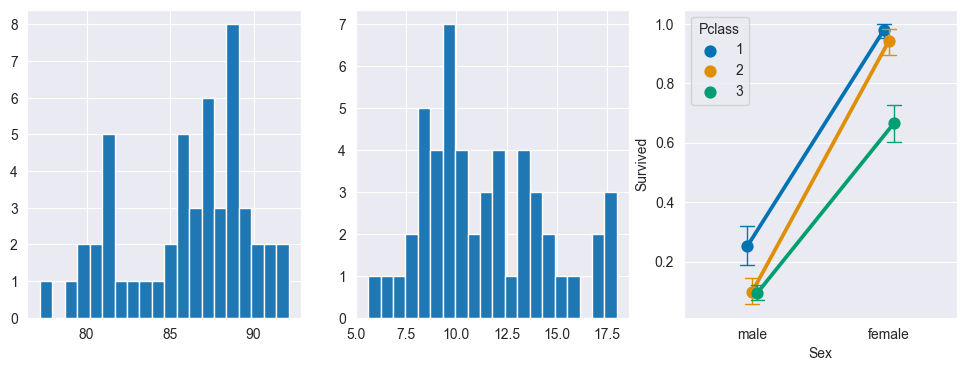

In [220]:
# subplots() — строим несколько графиков
# (ax1, ax2), subplots(1, 3) — количество и расположение графиков, первое число кол-во по горизонтали, второе по вертикали

# hist(x, bin) — строит гистограмму, второе параметр кол-во промежутков
# pointplot() — удобен при двухфакторном дисперсионном анализе
df = pd.read_csv('http://d396qusza40orc.cloudfront.net/statistics/lec_resources/states.csv')
x = df['hs_grad']
y = df['poverty']

data = pd.read_csv('https://raw.githubusercontent.com/betelgeus/fundamentals_of_statistics_notes/main/data/titanik_full_data.csv', sep='\t', usecols=['Survived', 'Sex', 'Pclass', 'Age'])

figure, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,4))
ax1.hist(x, 20)
ax2.hist(y, 20)
sns.pointplot(data=data, x='Sex', y='Survived', hue='Pclass', dodge=True, capsize=.1, errwidth=1, palette='colorblind', ax=ax3)
plt.show()

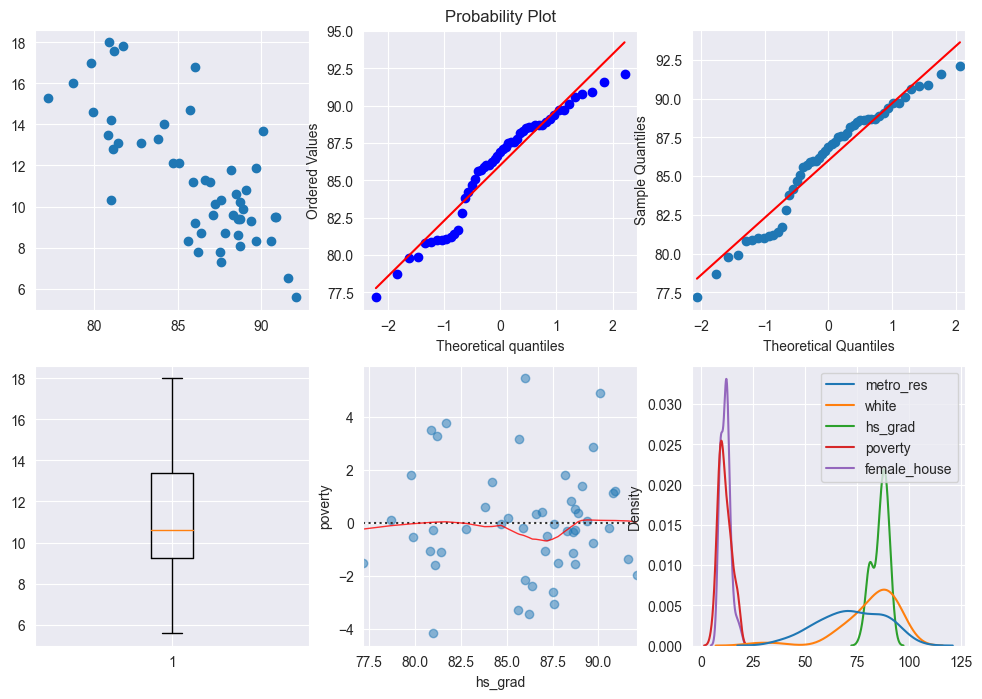

In [217]:
# scatter() —  диаграмма рассеяния
# probplot(x, dist="norm") — QQ plot
# qqplot() — QQ plot
# boxplot() — boxplot, ящик с усами, диаграмма размаха
# residplot() — график остатков
# kdeplot() — график плотности

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(12,8))
ax1.scatter(x, y)
stats.probplot(x, dist="norm", plot=ax2)
sm.qqplot(x, line='s', ax=ax3)
ax4.boxplot(y)
sns.residplot(x=x, y=y, data=df, lowess=True, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8}, ax=ax5)
sns.kdeplot(df, ax=ax6)

plt.show()

/Users/mitya/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


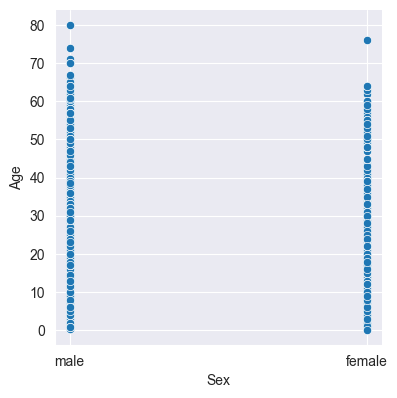

In [224]:
# график парных взаимосвязей
sns.pairplot(data, y_vars="Age", x_vars=['Sex'], size=4)
plt.show()

<AxesSubplot:>

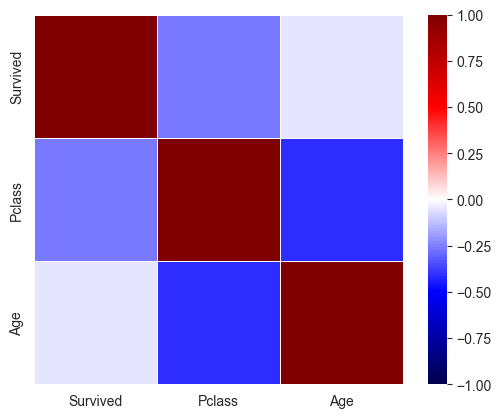

In [222]:
# тепловая карта
sns.heatmap(data.corr(), vmax=1, vmin=-1, center=0, cmap='seismic', square=True, linewidths=.5, annot=False, fmt=".2f")